In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [100]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [74]:
def read_data(filename):
    theta = pd.read_csv(filename, header = None)
    theta = theta[[0, 1, 2, 3, 9, 10]]
    theta[0] = theta[0].apply(lambda x: int(x.replace("(", "")))
    theta[10] = theta[10].apply(lambda x: float(x.replace(")", "")))
    for i in [2,3]:
        theta[i] = theta[i].apply(lambda x: int(x))
    theta[9] = theta[9].apply(lambda x: float(x))
    theta = theta.sort_values(by=[0, 2, 3])
    theta = theta.rename(columns={0:"partitions", 1:"condition", 2:"attrIndex1", 3:"attrIndex2", 9:"mean", 10:"std"})
    return theta

In [75]:
theta_4000 = read_data("../thetajoin_count_4000.txt")
theta_4000

,partitions,condition,attrIndex1,attrIndex2,mean,std
0,1,<,1,1,1.471255,0.232859
1,1,>,1,1,1.358859,0.314297
23,1,<,1,2,1.307823,0.288382
28,1,>,1,2,1.201210,0.086726
21,1,<,2,1,0.101881,0.027700
...,...,...,...,...,...,...
78,512,<,1,2,0.702028,0.036650
20,512,>,2,1,0.678819,0.027542
79,512,<,2,1,0.121191,0.010137
17,512,<,2,2,0.571737,0.056106


In [64]:
theta_4000_2_2 = theta_4000[(theta_4000["attrIndex1"]==2) & (theta_4000["attrIndex2"]==2)]

In [76]:
theta_4000_2_2_less = theta_4000_2_2[theta_4000_2_2["condition"]=="<"].sort_values(by="partitions")
theta_4000_2_2_more = theta_4000_2_2[theta_4000_2_2["condition"]==">"].sort_values(by="partitions")

<ErrorbarContainer object of 3 artists>

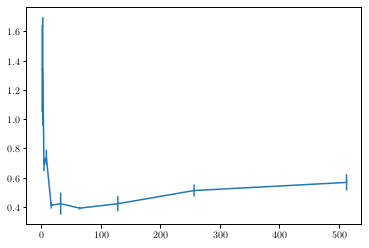

In [101]:
plt.errorbar(theta_4000_2_2_less["partitions"], theta_4000_2_2_less["mean"], yerr=theta_4000_2_2_less["std"])

C:\Users\Manuel\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


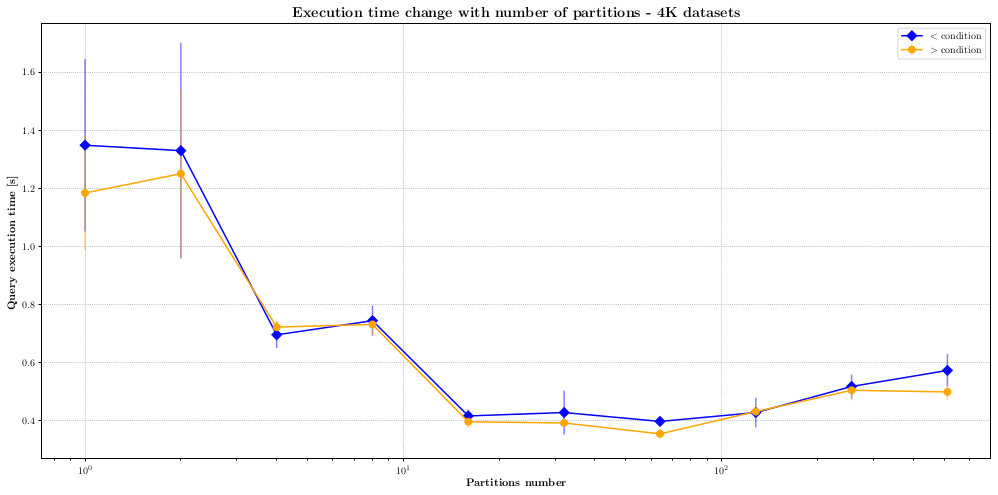

In [142]:
plt.figure(figsize=(17, 8))
label = "4K"

# Plot data and save figure
markers, caps, bars = plt.errorbar(theta_4000_2_2_less["partitions"], theta_4000_2_2_less["mean"], yerr=theta_4000_2_2_less["std"], label = "$<$ condition",
                                   color="blue", marker="D", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
markers, caps, bars = plt.errorbar(theta_4000_2_2_more["partitions"], theta_4000_2_2_more["mean"], yerr=theta_4000_2_2_more["std"], label = "$>$ condition",
                                   color="orange", marker="o", markersize=7)
[bar.set_alpha(0.5) for bar in bars]
plt.grid(linestyle='dotted')

# set labels (LaTeX can be used) -> Note: with the setting deactivated, this will print \textbf{...}
plt.xlabel(r'\textbf{Partitions number}', fontsize=11)
plt.ylabel(r'\textbf{Query execution time [s] }', fontsize=11)
plt.title(r'\textbf{Execution time change with number of partitions - ' + label + ' datasets}', fontsize=13.5)
plt.legend()
plt.xscale("log")

# plt.savefig("plot/" + savename + ".pdf")
plt.show()

<ErrorbarContainer object of 3 artists>

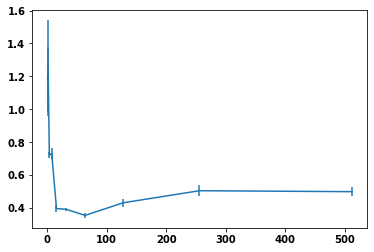

In [79]:
plt.errorbar(theta_4000_2_2_more["partitions"], theta_4000_2_2_more["mean"], yerr=theta_4000_2_2_more["std"])

In [81]:
theta_4000_1_1 = theta_4000[(theta_4000["attrIndex1"]==1) & (theta_4000["attrIndex2"]==1)]

In [82]:
theta_4000_1_1_less = theta_4000_1_1[theta_4000_1_1["condition"]=="<"].sort_values(by="partitions")
theta_4000_1_1_more = theta_4000_1_1[theta_4000_1_1["condition"]==">"].sort_values(by="partitions")

<ErrorbarContainer object of 3 artists>

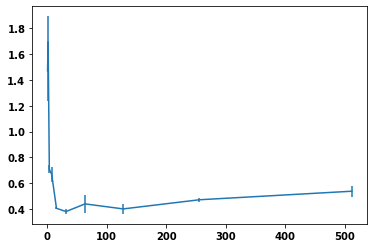

In [83]:
plt.errorbar(theta_4000_1_1_less["partitions"], theta_4000_1_1_less["mean"], yerr=theta_4000_1_1_less["std"])

<ErrorbarContainer object of 3 artists>

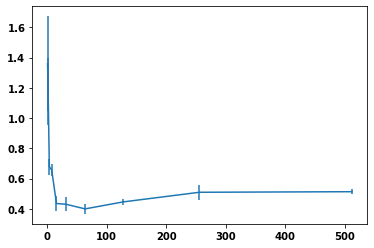

In [84]:
plt.errorbar(theta_4000_1_1_more["partitions"], theta_4000_1_1_more["mean"], yerr=theta_4000_1_1_more["std"])

In [93]:
theta_4000_1_2 = theta_4000[(theta_4000["attrIndex1"]==1) & (theta_4000["attrIndex2"]==2)]
theta_4000_1_2_less = theta_4000_1_2[theta_4000_1_2["condition"]=="<"].sort_values(by="partitions")
theta_4000_1_2_more = theta_4000_1_2[theta_4000_1_2["condition"]==">"].sort_values(by="partitions")

<ErrorbarContainer object of 3 artists>

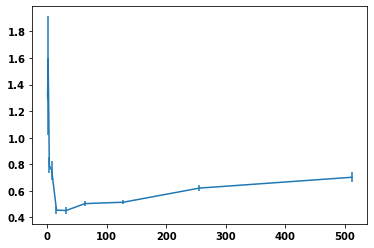

In [94]:
plt.errorbar(theta_4000_1_2_less["partitions"], theta_4000_1_2_less["mean"], yerr=theta_4000_1_2_less["std"])

<ErrorbarContainer object of 3 artists>

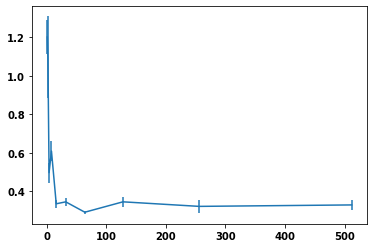

In [95]:
plt.errorbar(theta_4000_1_2_more["partitions"], theta_4000_1_2_more["mean"], yerr=theta_4000_1_2_more["std"])

In [96]:
theta_4000_2_1 = theta_4000[(theta_4000["attrIndex1"]==2) & (theta_4000["attrIndex2"]==1)]
theta_4000_2_1_less = theta_4000_2_1[theta_4000_2_1["condition"]=="<"].sort_values(by="partitions")
theta_4000_2_1_more = theta_4000_2_1[theta_4000_2_1["condition"]==">"].sort_values(by="partitions")

<ErrorbarContainer object of 3 artists>

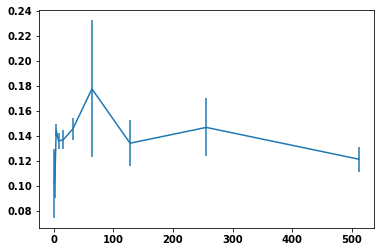

In [97]:
plt.errorbar(theta_4000_2_1_less["partitions"], theta_4000_2_1_less["mean"], yerr=theta_4000_2_1_less["std"])

<ErrorbarContainer object of 3 artists>

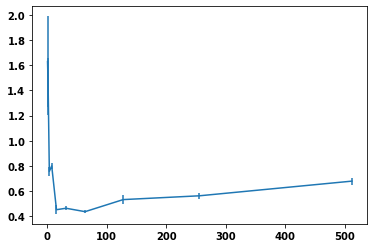

In [98]:
plt.errorbar(theta_4000_2_1_more["partitions"], theta_4000_2_1_more["mean"], yerr=theta_4000_2_1_more["std"])